## Getting and Preprocessing the Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
final_train = pd.read_csv('wage_train.csv')
final_test = pd.read_csv('wage_test.csv')
final_train.apply(lambda x: sum(x.isnull()))# Checks missing values across  columns 
final_test.apply(lambda x: sum(x.isnull()))# Checks missing values across  columns 


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [3]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null int64
fnlwgt            30162 non-null int64
education         30162 non-null int64
education_num     30162 non-null int64
marital_status    30162 non-null int64
occupation        30162 non-null int64
relationship      30162 non-null int64
race              30162 non-null int64
sex               30162 non-null int64
capital_gain      30162 non-null int64
capital_loss      30162 non-null int64
hours_per_week    30162 non-null int64
native_country    30162 non-null int64
wage_class        30162 non-null int64
dtypes: int64(15)
memory usage: 3.5 MB


In [4]:
final_train['wage_class'].value_counts()

0    22654
1     7508
Name: wage_class, dtype: int64

In [5]:
final_test['wage_class'].value_counts()

0    11360
1     3700
Name: wage_class, dtype: int64

In [6]:
y_train = final_train.pop('wage_class')# POP--- Drops column wage class  from data frame 
y_test = final_test.pop('wage_class')# POP--- Drops column wage class  from data frame 

## Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [8]:
%%time

rfc.fit(final_train, y_train)

Wall time: 4.26 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
predictions = rfc.predict(final_test) 

In [10]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, auc ,roc_curve

In [11]:
print('accuracy %s' % accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print('confusion matrix\n %s' % cm)

accuracy 0.848937583001
confusion matrix
 [[10505   855]
 [ 1420  2280]]


In [12]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90     11360
          1       0.73      0.62      0.67      3700

avg / total       0.84      0.85      0.84     15060



In [13]:
y_proba = rfc.predict_proba(final_test)
#type(y_proba) # gives you numpy array
y_prob=y_proba[:,1]
#y_prob

array([ 0.  ,  0.22,  0.48, ...,  0.84,  0.23,  0.74])

In [15]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [16]:
y_prob

array([ 0.        ,  0.19130435,  0.43478261, ...,  0.8       ,
        0.17391304,  0.68695652])

In [17]:
roc_auc

0.90341273315569082

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr=LogisticRegression()

In [18]:
%%time
lr.fit(final_train,y_train)

Wall time: 532 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
predictions=lr.predict(final_test)

In [21]:
print('accuracy %s' % accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print('confusion matrix\n %s' % cm)

accuracy 0.78625498008
confusion matrix
 [[10751   609]
 [ 2610  1090]]


In [23]:
y_proba = lr.predict_proba(final_test)
#type(y_proba) # gives you numpy array
y_prob=y_proba[:,1]
#y_prob

In [24]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.75659417824514663

## GBM

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
grd = GradientBoostingClassifier(n_estimators=100)

In [26]:
grd.fit(final_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [27]:
predictions = grd.predict(final_test)

In [28]:
print('accuracy %s' % accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print('confusion matrix\n %s' % cm)

accuracy 0.862948207171
confusion matrix
 [[10759   601]
 [ 1463  2237]]


In [29]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91     11360
          1       0.79      0.60      0.68      3700

avg / total       0.86      0.86      0.86     15060



In [30]:
y_proba = grd.predict_proba(final_test)
y_prob=y_proba[:,1]

In [31]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.91828584173962691

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr=LogisticRegression()

In [57]:
%%time
lr.fit(final_train,y_train)

Wall time: 534 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
predictions=lr.predict(final_test)

In [59]:
print('accuracy %s' % accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print('confusion matrix\n %s' % cm)

accuracy 0.78625498008
confusion matrix
 [[10751   609]
 [ 2610  1090]]


In [60]:
y_proba = lr.predict_proba(final_test)
y_prob=y_proba[:,1]

In [61]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.75659417824514663

## XGBoost

In [26]:
#pip install xgboost

In [32]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [33]:
model = xgb.XGBClassifier()

In [34]:
model.fit(final_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [35]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, auc ,roc_curve
y_pred = model.predict(final_test) # Predict using our testdmat
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [36]:
y_proba = model.predict_proba(final_test)
y_prob=y_proba[:,1]

In [37]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.86155378486055778, 0.13844621513944222)

In [38]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix\n %s' % cm)
print(classification_report(y_test,y_pred))

confusion matrix
 [[10785   575]
 [ 1510  2190]]
             precision    recall  f1-score   support

          0       0.88      0.95      0.91     11360
          1       0.79      0.59      0.68      3700

avg / total       0.86      0.86      0.85     15060



In [39]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.91813941758660067

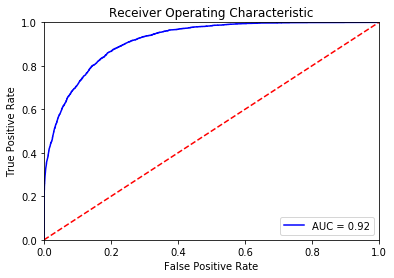

In [40]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

** Parameters Tuning **

To see all of the available parameters that can be tuned in XGBoost, have a look at the [parameter documentation](https://github.com/dmlc/xgboost/blob/master/doc/parameter.md). This should help you better understand the choices

In [41]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 


Now let's run our grid search with 5-fold cross-validation and see which parameters perform the best.

In [42]:
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

Let's check our grid scores.

In [43]:
optimized_GBM.grid_scores_

[mean: 0.86712, std: 0.00225, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.86659, std: 0.00339, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.86659, std: 0.00295, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.86214, std: 0.00197, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.86161, std: 0.00143, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.86208, std: 0.00236, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.85651, std: 0.00183, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.85575, std: 0.00246, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.85694, std: 0.00347, params: {'max_depth': 7, 'min_child_weight': 5}]

In [44]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

Again, check the grid scores. 

In [49]:
optimized_GBM.grid_scores_

[mean: 0.86622, std: 0.00271, params: {'subsample': 0.7, 'learning_rate': 0.1},
 mean: 0.86685, std: 0.00239, params: {'subsample': 0.8, 'learning_rate': 0.1},
 mean: 0.86771, std: 0.00349, params: {'subsample': 0.9, 'learning_rate': 0.1},
 mean: 0.85999, std: 0.00307, params: {'subsample': 0.7, 'learning_rate': 0.01},
 mean: 0.86032, std: 0.00272, params: {'subsample': 0.8, 'learning_rate': 0.01},
 mean: 0.86002, std: 0.00282, params: {'subsample': 0.9, 'learning_rate': 0.01}]

No, it doesn't look like we can improve on this. However, we may be able to optimize a little further by utilizing XGBoost's built-in cv which allows early stopping to prevent overfitting. 

** Early stopping CV **

Based on the CV testing performed earlier, we want to utilize the following parameters:

- Learning_rate (eta) = 0.1
- Subsample, colsample_bytree = 0.8
- Max_depth = 3
- Min_child_weight = 1


In [50]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient

Now let's specify our parameters (with slightly different syntax in some places for the XGBoost native API) and set our stopping criteria. For now, let's be aggressive with the stopping and say we don't want the accuracy to improve for at least 100 new trees.

In [51]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

We can look at our CV results to see how accurate we were with these settings. The output is automatically saved into a pandas dataframe for us. 

In [52]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
457,0.130173,0.004067,0.116570,0.001104
458,0.130106,0.004026,0.116578,0.001137
459,0.130040,0.003949,0.116520,0.001080
460,0.130073,0.003919,0.116537,0.001141
461,0.129974,0.003961,0.116512,0.001133


Now that we have our best settings, let's create this as an XGBoost object model that we can reference later. 

In [53]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 461)

Notice that it trains very quickly. With our XG model object, we can then plot our feature importances using a built-in method. This is similar to the feature importances found in sklearn. 

In [54]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

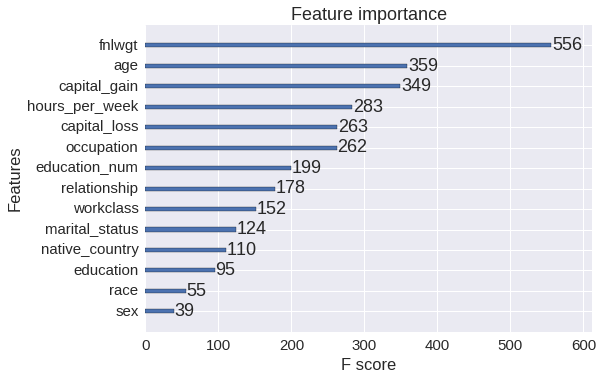

In [55]:
xgb.plot_importance(final_gb)

This will tell us which features were most important in the series of trees. The 'fnlwgt' feature seems to have the most importance. Filing capital gains was also important, which makes sense given that only those with greater incomes have the ability to invest. Race and sex were not as important. This may be because we are just predicting a specific threshold (below/above 50000 a year) instead of a precise income. 

In [59]:
testdmat = xgb.DMatrix(final_test)

In [60]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, auc ,roc_curve
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([ 0.00302884,  0.20670944,  0.30002904, ...,  0.8292715 ,
        0.15922189,  0.78374606], dtype=float32)

You can see that the predict function for XGBoost outputs probabilities by default and not actual class labels. To calculate accuracy we need to convert these to a 0/1 label. We will set 0.5 probability as our threshold. 

In [61]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

In [62]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 0.,  0.,  0., ...,  1.,  0.,  1.], dtype=float32)

Now we can calculate our accuracy. 

In [63]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.86965471447543163, 0.13034528552456837)

In [64]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.89      0.94      0.92     11360
          1       0.78      0.66      0.71      3700

avg / total       0.87      0.87      0.87     15060



In [65]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix\n %s' % cm)
print(classification_report(y_test,y_pred))

confusion matrix
 [[10652   708]
 [ 1255  2445]]
             precision    recall  f1-score   support

          0       0.89      0.94      0.92     11360
          1       0.78      0.66      0.71      3700

avg / total       0.87      0.87      0.87     15060



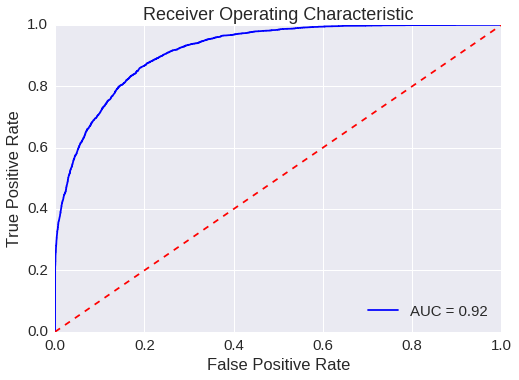

In [66]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Cat Boost

In [46]:
!pip install catboost
from catboost import CatBoostClassifer

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


ImportError: cannot import name 'CatBoostClassifer'